In [1]:
# Solo estas x librerias son necesarias

#import csv
#import numpy as np
import dnaplotlib as dpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage import io
%matplotlib inline 

In [2]:
# Se crea un diccionario con los colores que se usaran en la imagen, de todas maneras el color puede ponerse despues.
# Cada color es resultado de valores entre 0 y 1 en RGB.

col_map = {} #Diccionario vacio
col_map['red']     = (0.95, 0.30, 0.25)
col_map['green']   = (0.38, 0.82, 0.32)
col_map['blue']    = (0.38, 0.65, 0.87)
col_map['orange']  = (1.00, 0.75, 0.17)
col_map['purple']  = (0.55, 0.35, 0.64)
col_map['yellow']  = (0.98, 0.97, 0.35)
col_map['grey']    = (0.70, 0.70, 0.70)
col_map['dark_grey'] = (0.60, 0.60, 0.60)
col_map['light_grey'] = (0.9, 0.9, 0.9)


In [3]:
# Se da Formato a los CDS

# label = Corresponde al nombre del CDS
# label_style = Tipo de letra (italic ,normal or oblique)
# label_y_offset = Desplazamiento desde el centro del CDS('0' es el centro)
# color = Color del CDS se especifica segun el diccionario usado anteriormente. 
# label_color = especifica el color de la label (Usa RGB entre 0 y 1)

opt_CDS1 = {'label':'geneA', 'label_style':'italic', 'label_y_offset':-0.2, 'color':col_map['blue']}
opt_CDS2 = {'label':'geneB', 'label_style':'normal', 'label_y_offset':-0.2, 'color':col_map['dark_grey']}
opt_CDS3 = {'label':'geneC', 'label_color': (1,1,1), 'label_style':'oblique', 'label_y_offset':-0.2, 'color':col_map['purple']}
opt_CDS4 = {'label':'geneD', 'label_style':'normal', 'label_y_offset':-0.2, 'color':col_map['red']}
opt_CDS5 = {'label':'geneE', 'label_style':'italic', 'label_y_offset':-0.2, 'color':col_map['light_grey']}
opt_UD1 = {'label':'Z', 'label_color': (1,0,0), 'label_style':'italic', 'label_y_offset':-0.2, 'color':col_map['orange']}

In [4]:
%%html
Partes Disponibles
<img src = 'partesdnaplotlib.png', width = 1000 , height = 1000 >



In [5]:
# Diseño de cada una de las partes que contienen los 3 constructos 

# type = Define la parte correspondiente

# Standard part types
#    'Promoter','CDS', 'Terminator', 'RBS', 'Scar', 'Spacer', 'EmptySpace', 'Ribozyme', Ribonuclease',
#    'Protease', 'DNACleavageSite', 'RNACleavageSite', 'ProteinCleavageSite', 'DNALocation', 'RNALocation',
#    'ProteinLocation', 'DNAStability', 'RNAStability', 'ProteinStability', 'StemTop', 'Operator', 'Origin',
#    'Insulator', '5Overhang', '3Overhang', 'RestrictionSite', 'BluntRestrictionSite', 'PrimerBindingSite',
#    '5StickyRestrictionSite', '3StickyRestrictionSite', 'UserDefined', 'Signature']

# name = Nombre de la parte
# start y end = Determina comienzo y final de cada pieza...es importante para determinar el tamano de la pieza y relativizarla respecto a otras
# fwd = Direccionalidad de la pieza, True = Fwd y False = Rev
# opts = Se linkea con el formato anteriormente definido, si no es necesario se pone directamente el color.

P1 = {'type':'Promoter', 'name':'P1', 'start':0,    'end':23,   'fwd':True, 'opts':{'color':col_map['green']}}
RBS1 = {'type':'RBS', 'name':'RBS1', 'start':72,   'end':106,  'fwd':True, 'opts':{'color':col_map['blue']}}
RBS2 = {'type':'RBS', 'name':'RBS2', 'start':1353, 'end':1392, 'fwd':True, 'opts':{'color':col_map['blue']}}
CDS1 = {'type':'CDS', 'name':'CDS1', 'start':106,  'end':1249, 'fwd':True, 'opts':opt_CDS1}
CDS2 = {'type':'CDS', 'name':'CDS2', 'start':1392, 'end':2595, 'fwd':True, 'opts':opt_CDS2}
CDS3 = {'type':'CDS', 'name':'CDS3', 'start':800, 'end':1400, 'fwd':True, 'opts':opt_CDS3}
CDS4 = {'type':'CDS', 'name':'CDS4', 'start':1700, 'end':2200, 'fwd':True, 'opts':opt_CDS4}
Feature3_4 = {'type':'UserDefined', 'name':'UD1', 'start':1450, 'end':1650, 'fwd':True, 'opts':opt_UD1}
CDS5 = {'type':'CDS', 'name':'CDS5', 'start':1500, 'end':100, 'fwd':False, 'opts':opt_CDS5}
T1 = {'type':'Terminator', 'name':'T1', 'start':2595, 'end':2643, 'fwd':True, 'opts':{'color':col_map['red']}}


In [6]:
# Se genera el diseño, entendiendo por este una lista de las partes y sus propiedades

design_frame1 = [P1, RBS1, CDS1, RBS2, CDS2, T1]
design_frame2 = [CDS3, Feature3_4, CDS4]
design_frame3 = [CDS5]

# Se genera una lista de todos los diseños, esto sirve para determinar el orden en la imagen final

designs = [design_frame1, design_frame2, design_frame3] 

In [7]:
# Graficar los diagramas de ADN en un solo eje con y_offsets para frames alternativos

def plot_trace_y_offset (designs, output_prefix):
    design_frame1 = designs[0]
    design_frame2 = designs[1]
    design_frame3 = designs[2]

    #Generate the offsets for each design
    
    frame2_offset = 9.0
    
    for part in design_frame2:
        if 'opts' in list(part.keys()):
            part['opts']['y_offset'] = frame2_offset
        else:
            part['opts'] = {'y_offset': frame2_offset}
    
    frame3_offset = 16.0
    
    for part in design_frame3:
        if 'opts' in list(part.keys()):
            part['opts']['y_offset'] = frame3_offset
        else:
            part['opts'] = {'y_offset': frame3_offset}

# We can now combine all into a single design
    
    combined_designs = design_frame1 + design_frame2 + design_frame3

# Create the figure and all axes to draw to
    
    fig = plt.figure(figsize=(3.2,1.2))
    gs = gridspec.GridSpec(1, 1)
    ax_dna_all_frames = plt.subplot(gs[0])

# Redender the DNA
    dr = dpl.DNARenderer(scale=5, linewidth=0.9)
    start1, end1 = dr.renderDNA(ax_dna_all_frames, combined_designs, dr.trace_part_renderers(), plot_backbone=True)

    # We specify the length manually as we know the design constraints

    start1 = 0
    end1 = 2640
    dna_len = end1-start1
    ax_dna_all_frames.set_xlim([start1-20, end1+20])
    ax_dna_all_frames.set_ylim([-5,21]) #vALOR PUEDE DEPENDER DE LO QUE DEFINIMOS COMO OFFSET ANTERIOREMENTE (Revisar)

# We also plot a manual backbone beyond the extent of the design
   
    ax_dna_all_frames.plot([start1-20,end1+20], [0,0], color=(0,0,0), linewidth=1.0, zorder=1)
    ax_dna_all_frames.axis('off')

    plt.subplots_adjust(hspace=.001, left=.01, right=.99, top=0.99, bottom=0.01)

# Save the figure

    fig.savefig(output_prefix+'.pdf', transparent=True)
    fig.savefig(output_prefix+'.png', dpi=300)

# Clear the plotting cache
    plt.close('all')


In [8]:
plot_trace_y_offset(designs, 'offset_features_y_offset')

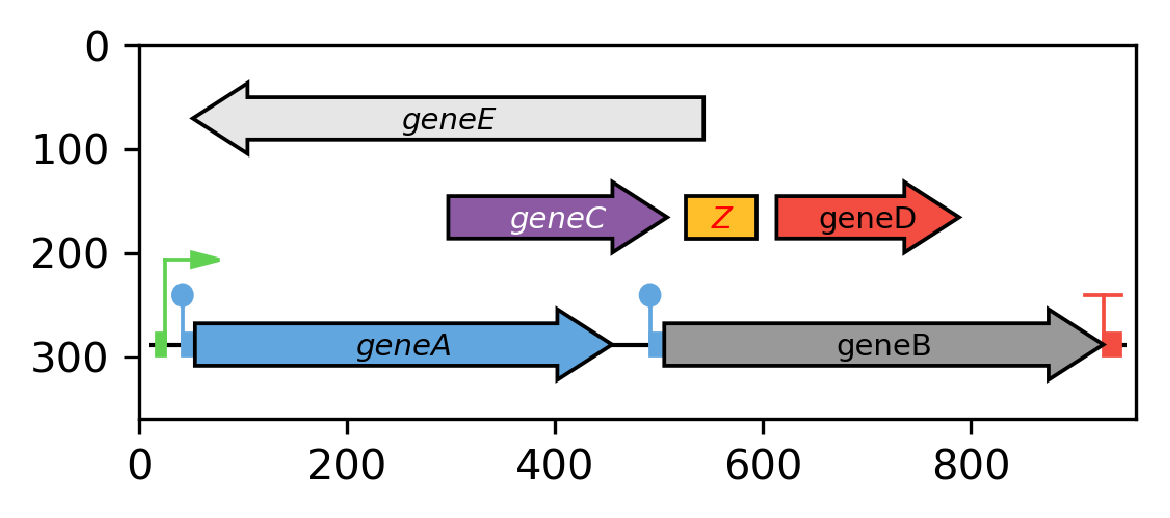

In [3]:
#Solo para ver cambios realizados en el codigo mas rapido
img = io.imread('offset_features_y_offset.png')
plt.figure(figsize=(4, 4), dpi=300)
io.imshow(img, cmap = 'gray')